In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd



In [3]:
#import my dataset
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#check the shape of the dataset
diabetes_data.shape

(768, 9)

In [ ]:
#check the columns of the dataset
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# check the info of the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# this is to check for missing values in the dataset
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# this is to check for duplicates in the data set
diabetes_data.duplicated().sum()

np.int64(0)

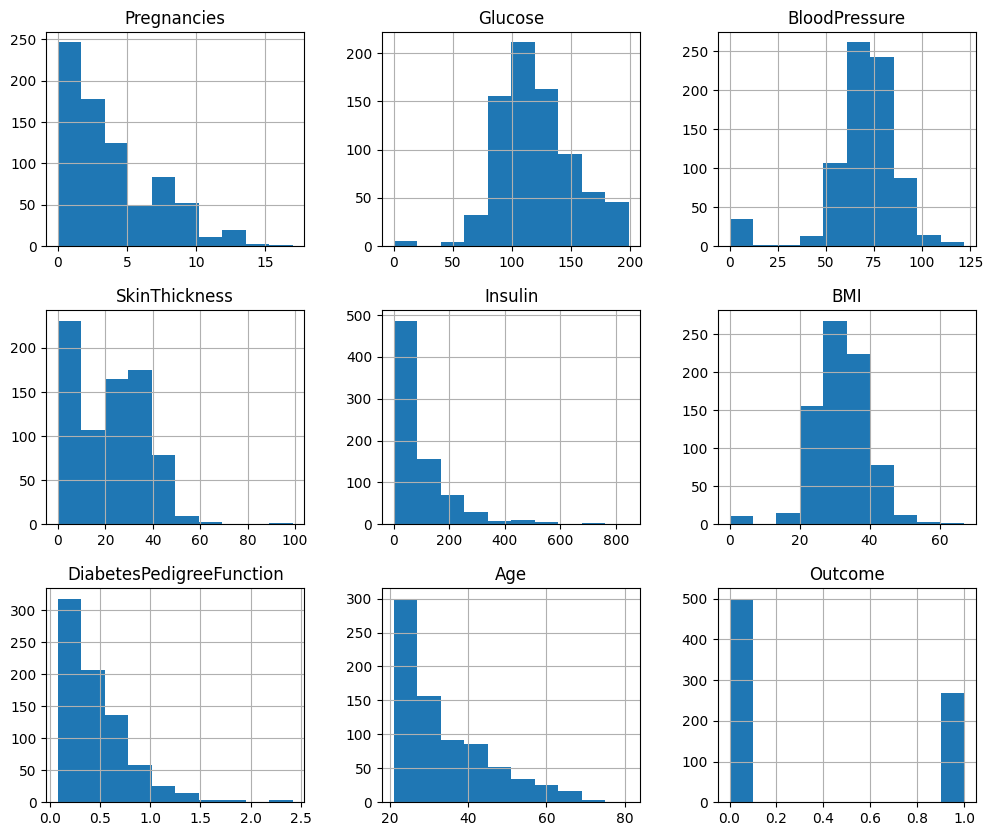

In [10]:
# this is to visualise the dataset
import matplotlib.pyplot as plt
import seaborn as sns
diabetes_data.hist(figsize=(12,10))
plt.show()

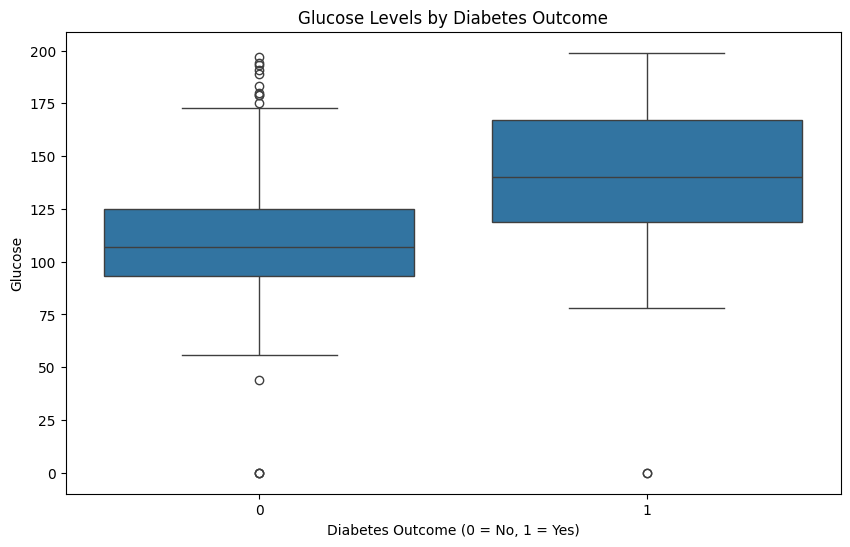

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data)
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Glucose")
plt.show()

Glucose vs Outcome
Insight:
The boxplot comparison shows that individuals diagnosed with diabetes (Outcome = 1) have significantly higher glucose levels than non-diabetic individuals. The median glucose level for diabetic patients is notably higher, with less overlap between the two groups.

Interpretation:
Glucose is the strongest predictor of diabetes in this dataset and plays a critical role in distinguishing diabetic from non-diabetic patients.

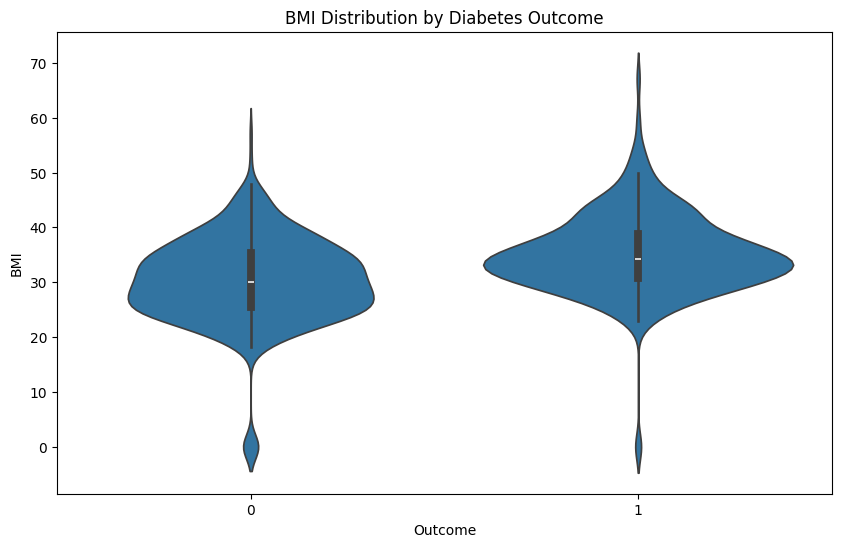

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Outcome', y='BMI', data=diabetes_data)
plt.title("BMI Distribution by Diabetes Outcome")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

BMI vs Outcome

Insight:
The BMI distribution for diabetic patients is shifted upward compared to non-diabetic patients. Diabetic individuals tend to have higher median BMI values, indicating a greater prevalence of overweight and obesity.

Interpretation:
Higher BMI is strongly associated with diabetes risk, making it an important feature for prediction and prevention analysis.

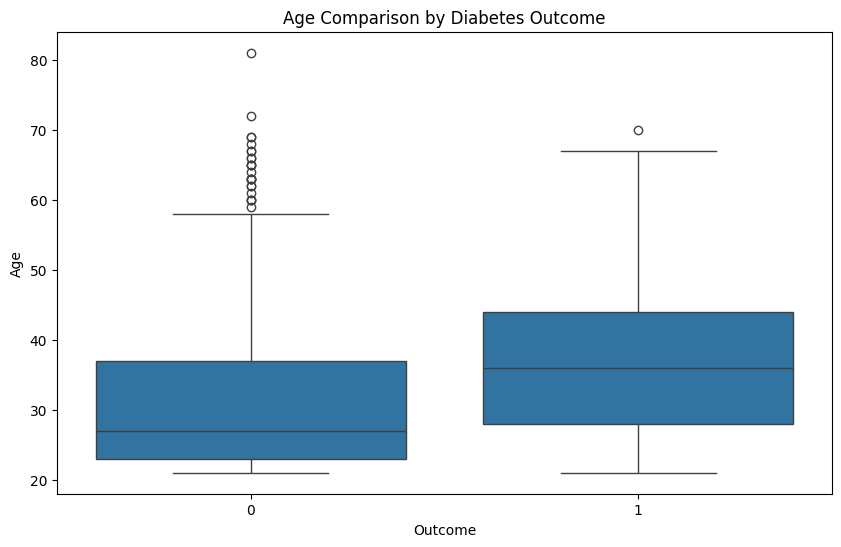

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Age', data=diabetes_data)
plt.title("Age Comparison by Diabetes Outcome")
plt.show()


Age vs Outcome

Insight:
The age comparison reveals that diabetic patients are generally older than non-diabetic patients. The median age and upper quartile are higher for the diabetic group.

Interpretation:
Age is a significant contributing factor, suggesting that the likelihood of diabetes increases with age.

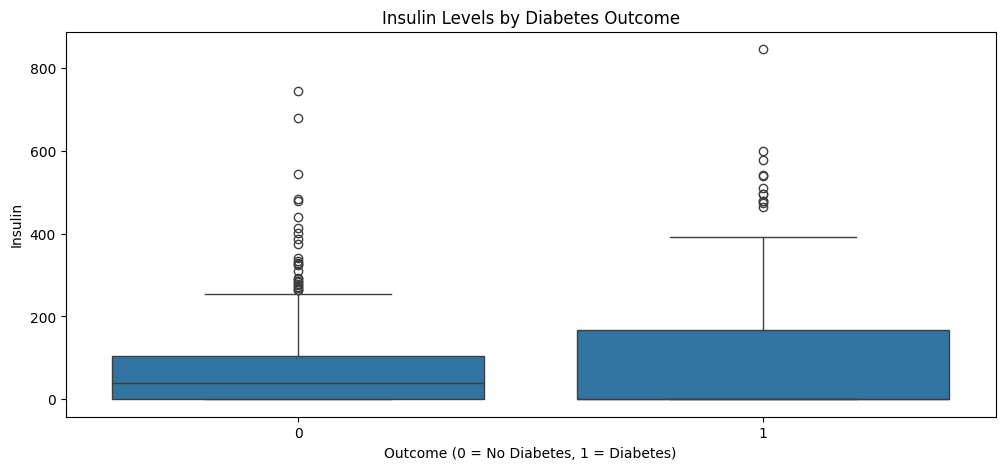

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.boxplot(x='Outcome', y='Insulin', data=diabetes_data)
plt.title("Insulin Levels by Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Insulin")
plt.show()

In [ ]:
Insulin vs Outcome

Insight:
Insulin levels display wide variability and several outliers, particularly among diabetic patients. The median insulin level is higher for diabetic individuals.

Interpretation:
Insulin is informative but noisy, and requires proper preprocessing due to outliers and previously missing (zero) values.

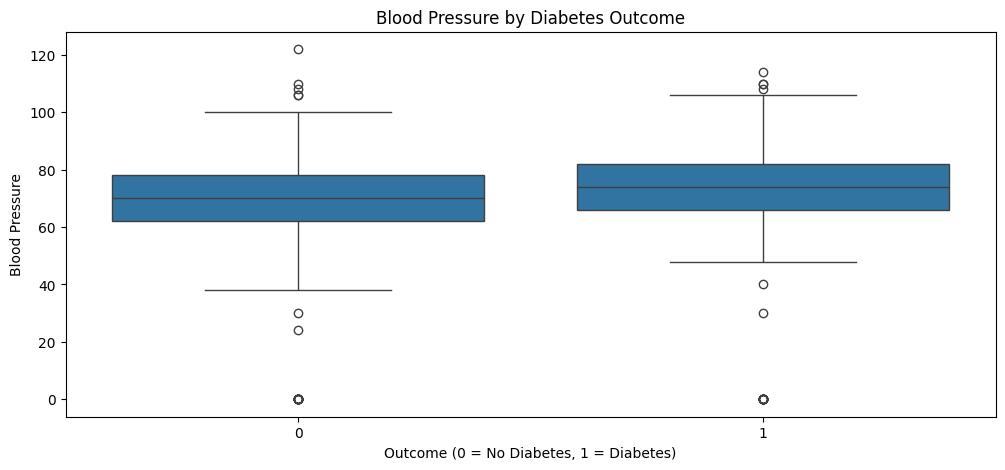

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_data)
plt.title("Blood Pressure by Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Blood Pressure")
plt.show()

Blood Pressure vs Outcome

Insight:
Blood pressure values show a slightly higher median for diabetic individuals, but with substantial overlap between both groups.

Interpretation:
While blood pressure contributes to diabetes risk, it is not a strong standalone predictor compared to glucose or BMI.

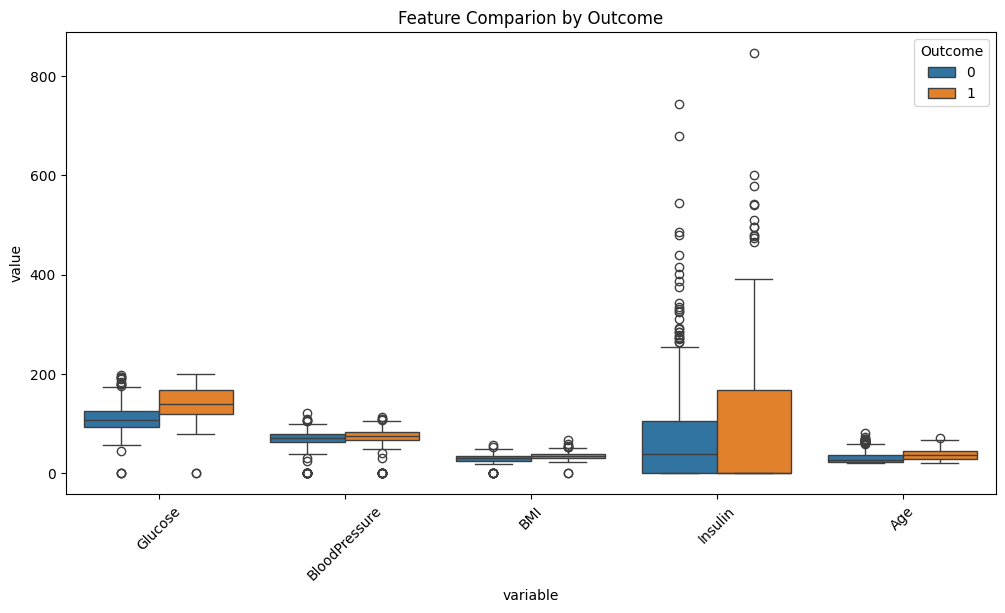

In [18]:
features = ["Glucose", "BloodPressure", "BMI", "Insulin", "Age"]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=diabetes_data[features + ['Outcome']].melt(id_vars='Outcome'),
    x='variable',
    y='value',
    hue='Outcome'
)
plt.xticks(rotation=45)
plt.title("Feature Comparion by Outcome")
plt.show()

Multi-Feature Comparison (Grouped Boxplots)

Insight:
Across multiple features, Glucose and BMI exhibit the clearest separation between outcomes, while features such as BloodPressure and SkinThickness show greater overlap.

Interpretation:
Not all features contribute equally; some provide stronger predictive power than others.


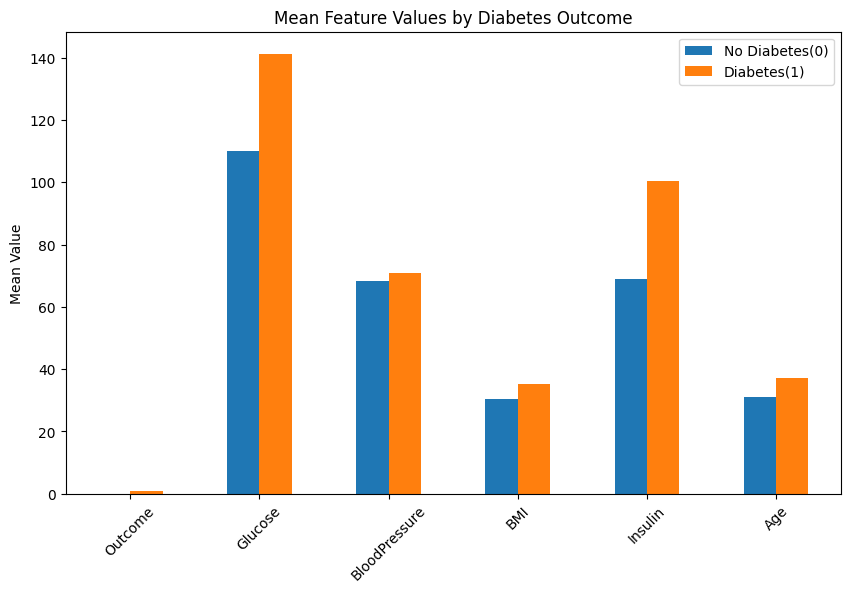

In [20]:
mean_values = diabetes_data.groupby('Outcome')[features].mean().reset_index()
mean_values.T.plot(kind='bar', figsize=(10,6))
plt.title("Mean Feature Values by Diabetes Outcome")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(['No Diabetes(0)', 'Diabetes(1)'])
plt.show()

Mean Feature Comparison (Bar Chart)

Insight:
The mean comparison visualization shows that diabetic patients have higher average values for:
	•	Glucose
	•	BMI
	•	Age
	•	Insulin

Non-diabetic patients show lower mean values across most medical indicators.

Interpretation:
This confirms a consistent pattern where elevated metabolic indicators are associated with diabetes.

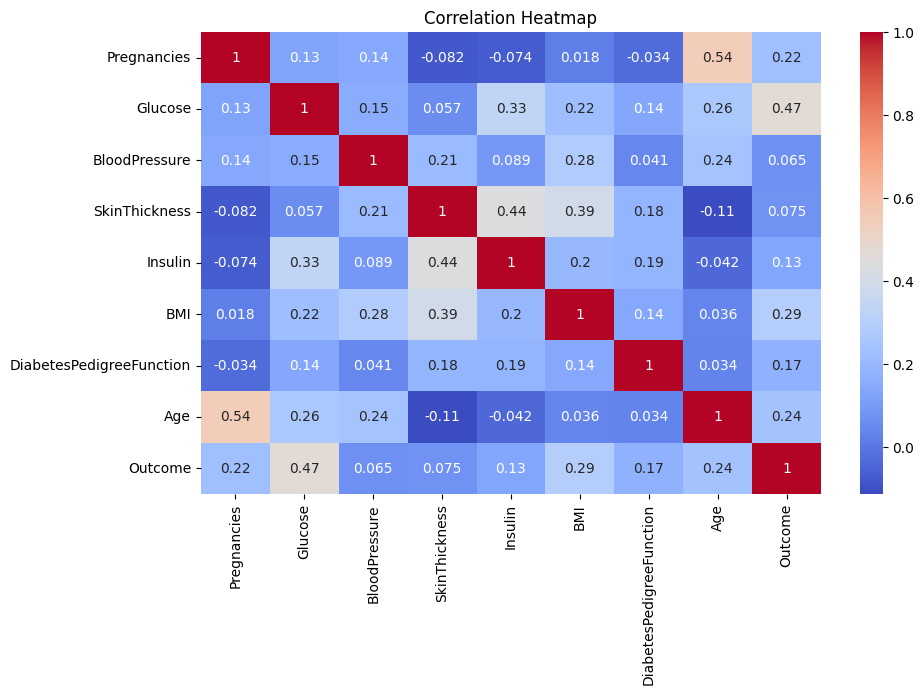

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

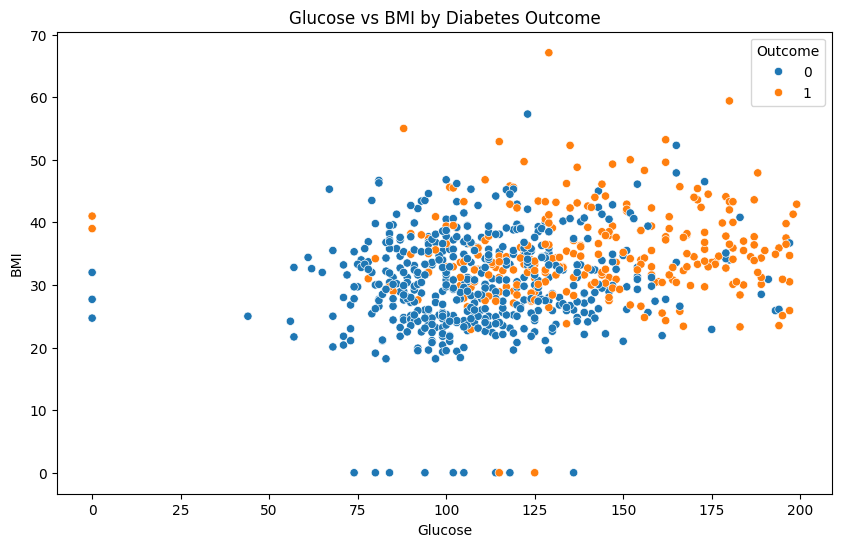

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=diabetes_data,
    x='Glucose',
    y='BMI',
    hue='Outcome'
)
plt.title("Glucose vs BMI by Diabetes Outcome")
plt.show()

Combined Insight (Glucose + BMI)

Insight:
When considered together, glucose and BMI show that diabetic patients generally have both higher blood glucose levels and higher body mass index. While glucose provides the clearest distinction between outcomes, BMI acts as a supporting risk factor that enhances predictive performance when used alongside glucose.

Overall Summary Insight

Comparison visualizations reveal that Glucose, BMI, and Age are the most influential factors distinguishing diabetic from non-diabetic individuals. These findings justify their importance in predictive modeling and support their inclusion in the final machine learning models.

In [ ]:
# this is to assign variables to my features(x) and target(y)
X = diabetes_data.drop('Outcome', axis=1) #features
y = diabetes_data['Outcome'] #target

In [ ]:
# this is to split assigned variables 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# this is to scale my variables
rom sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#this is to fit, predict and check the accuracy using LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.71
Confusion Matrix:
[[82 18]
 [26 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [ ]:
# here i used and model which is DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


Decision Tree Accuracy: 0.73


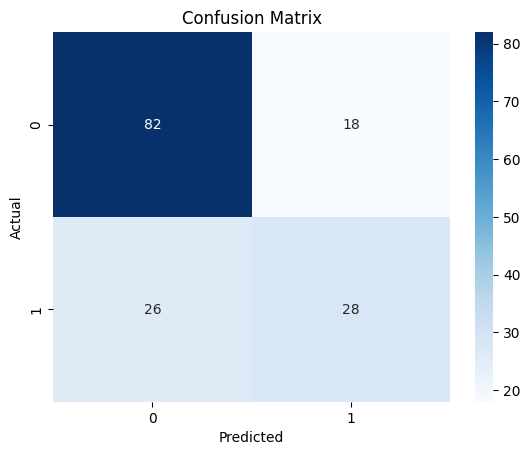

In [ ]:
# this is to check the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print ("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7597402597402597
